In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fileName = "exp4_result_rt_with_distance.csv"
simpleName = fileName.replace(".csv","")

sns.set(style="whitegrid")
# white, dark, whitegrid, darkgrid, ticks
sns.set_context("notebook", font_scale=1.15, rc={"lines.linewidth": 1.5,"axes.spines.left": False})

DISTANCE = "Distance"
CONGURITY = "Congurity"
ORDER = "Order"
AREA = "Area"
INIT = "Init"
MT = "Mt"
RT = "Rt"
DEP_V = RT

In [ ]:
data = pd.read_csv(fileName)
data = data.iloc[0:,:12]
nf = pd.DataFrame(columns=[DISTANCE, CONGURITY, ORDER, DEP_V])
for row in data.index:
    for column in data.columns:
        # print("For" + str(row) + ", " + str(column) + ", " + str(data[column][row]))
        d = {}
        if "D0" in column: d[DISTANCE] = "Distance 2"
        else: d[DISTANCE] = "Distance 5"
        if "C0" in column: d[CONGURITY] = "No Congurity"
        else: d[CONGURITY] = "Congurity"
        if "FB0" in column: d[ORDER] = "The smaller one first"
        elif "FB1" in column: d[ORDER] = "The larger one first"
        elif "FB2" in column: d[ORDER] = "The same time"
        d[DEP_V] = data[column][row]
        nf = nf.append(d, ignore_index= True)

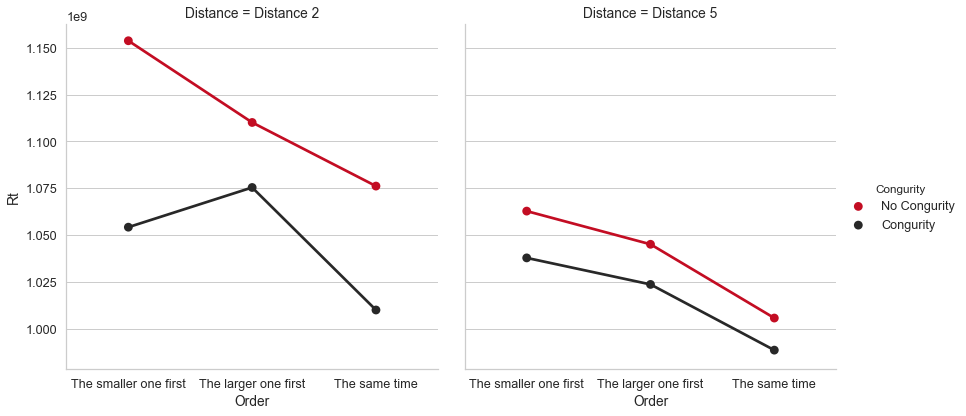

In [59]:
p = sns.catplot(x=ORDER, y=DEP_V, hue=CONGURITY,col=DISTANCE,capsize=.3,
               palette=["#C30D23", "#282828", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"],
               height=6,aspect=1,
               kind="point",data=nf,ci=None)
p.savefig(simpleName, dpi=100)